In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\cluster_data.csv')

In [3]:
#calulate weights
fields = ['age_category','education','science_education','employment_status','household_income','subjective_income','region','country','country_income']

for i in fields:
    count = data.groupby(i).count()['id']
    total = sum(count)
    
    globals()[i+'_weight'] = {}
    for j in range(len(count)):
        globals()[i+'_weight'][str(count.index[j])] = count.get(count.index[j])/total

In [4]:
data['count'] = 1

In [5]:
#print all clusters
for i in data['cluster_description'].unique():
    print(i)

no confidence in hospitals and clinics
v high belief science/tech will reduce local jobs in next 5 years
no trust in NGOs/non-profit/high desire to know more about science, medicine/disease/health
highest trust
lowest trust/high desire to know more about science, medicine/disease/health
low trust/no desire to know more about science, medicine/disease/health
no belief that scientists work to benefit people like you in country
high trust/no desire to know more about science, medicine/disease/health
averagely high trust
no confidence in NGOs


In [15]:
select_cluster = 'no belief that scientists work to benefit people like you in country'
field = 'country_income'

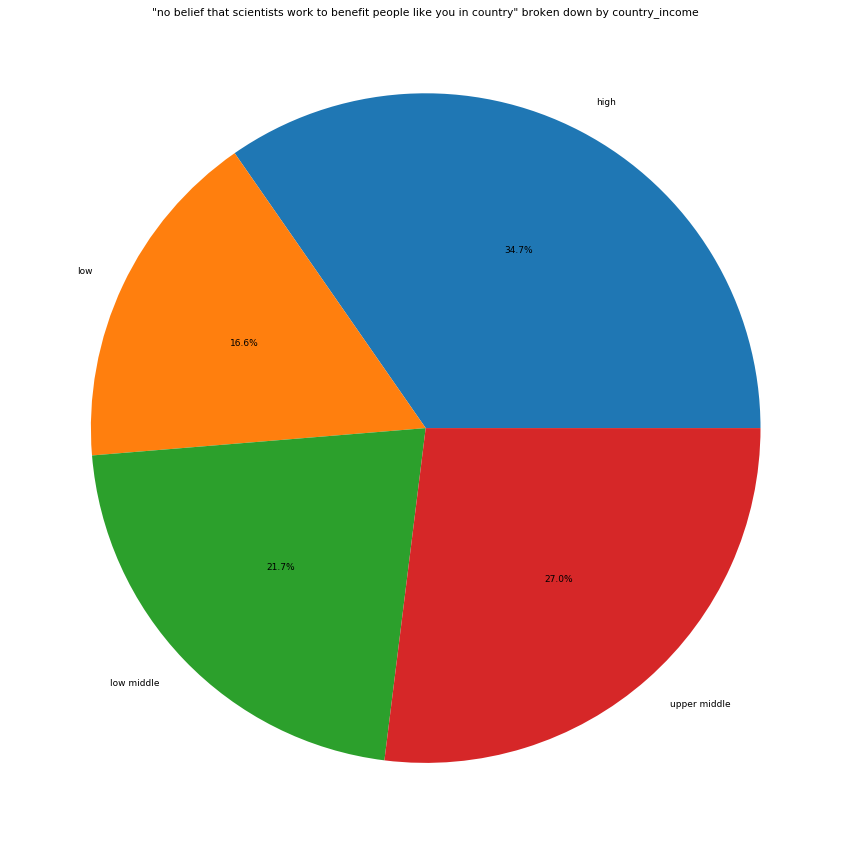

In [16]:
#show breakdown of selected cluster by field as pie chart

cluster = data[data['cluster_description'] == select_cluster]
pivot = pd.pivot_table(cluster,values = 'count',index = field,aggfunc=np.sum, fill_value = 0).reset_index()

weight_dictionary = globals()[field+'_weight']

def weightCount(value,count):
    return count/weight_dictionary.get(str(value))

pivot['weight_count'] = pivot[[field,'count']].apply(lambda x:weightCount(*x),axis=1)
pivot['weighted_fraction'] = pivot['weight_count']/pivot['weight_count'].sum()

labels = pivot[field]
sizes = pivot['weighted_fraction']

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)

plt.figure(figsize=(15,15))
plt.axis('equal')
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('"'+select_cluster+'" broken down by '+field)

plt.show()

In [10]:
df = pivot.sort_values(by='weighted_fraction',ascending=False).reset_index()